In [1]:
import glob
import nibabel as nib
from nilearn import plotting as niplt
from base.compare import match_parcellations
from base.tools import convert_nib
import numpy as np
from base.img_tools import binarize_level, convert_nib, threshold_nib
import matplotlib.pyplot as plt
import seaborn as sns
from base.plotting import nine_colors
import matplotlib as ml

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [9]:
reference = convert_nib(nib.load('../results/clustering/results/MFC/MF/kmeans_k3/cluster_labels.nii.gz'))

In [10]:
bootstrapped = glob.glob('../results/clustering/results/MFC/kmeans_*_3/*nii.gz')

In [11]:
converted_boots = [match_parcellations(reference, convert_nib(nib.load(rois)))[2] for rois in bootstrapped]

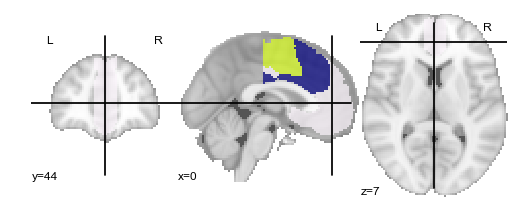

In [12]:
niplt.plot_roi(reference)

In [13]:
avg_parcels = [np.array([binarize_level(regions, i) for regions in converted_boots]).mean(axis=0) for i in range(1, 10)]

/Users/aleph4/anaconda/lib/python2.7/site-packages/nilearn/plotting/displays.py:576: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


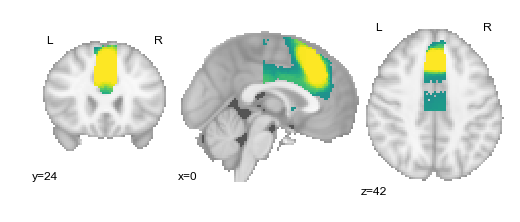

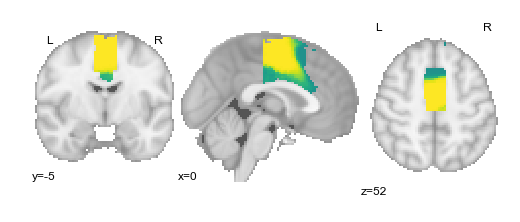

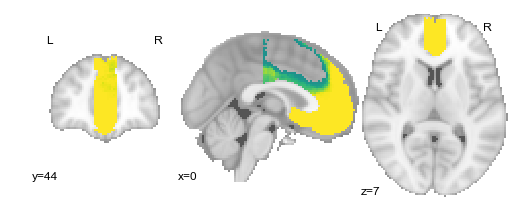

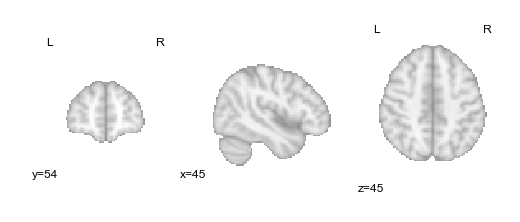

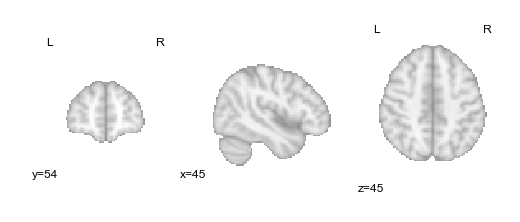

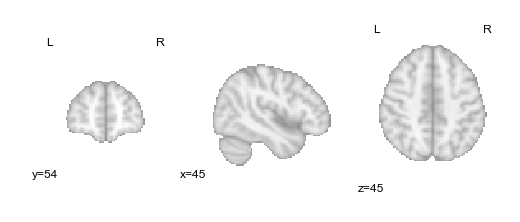

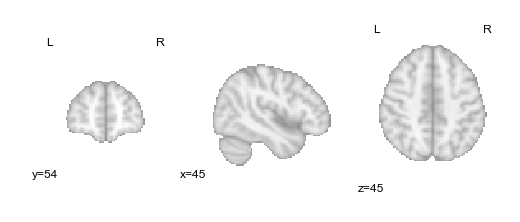

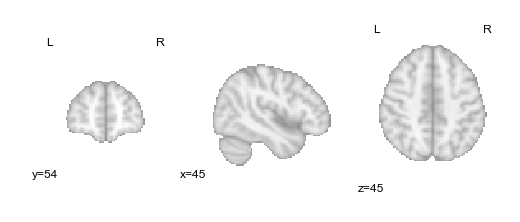

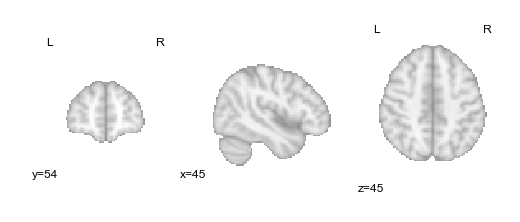

In [14]:
for i in range(0, len(avg_parcels)):
    avg_img = nib.nifti1.Nifti1Image(avg_parcels[i], reference.get_affine(), reference.get_header())
    niplt.plot_stat_map(avg_img, cmap=plt.get_cmap('viridis'), colorbar=False, draw_cross=False)

In [15]:
thresh_parcels = []
for i in range(0, len(avg_parcels)):
    data = threshold_nib(avg_parcels[i], 0.5)
    data[data == 1] = i + 1
    thresh_parcels.append(data)

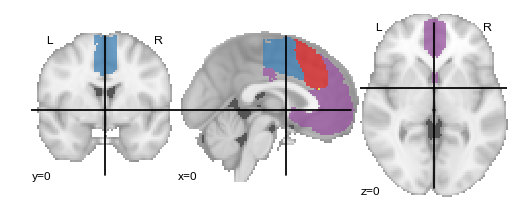

In [16]:
niplt.plot_roi(nib.nifti1.Nifti1Image(np.array(thresh_parcels).sum(axis=0), 
    reference.get_affine(), reference.get_header()), cmap = ml.colors.ListedColormap(nine_colors), draw_cross=True, 
              cut_coords=[0, 0, 0])